<a href="https://colab.research.google.com/github/samgdotson/2019-dotson-winter/blob/master/weather_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving willard_weather_data.csv to willard_weather_data.csv


In [0]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Here I resolve the missing data by using linear interpolation on the missing values. Fortunately, there are not many values that are missing. 


In [0]:
import re

# ===================================================================
# Useful functions
# ===================================================================


def isfloat(value):
    """
    This function checks if a string can be converted to a float.

    Parameters:
    -----------
    value : string

    Returns:
    --------
    boolean
    """
    try:
        float(value)
        return True
    except ValueError:
        return False


def to_float(dataframe, column):
    """
    This function converts all values in a specified column to float.
    It is necessary to create my own function because the data has some
    errors in it that prevent it from being parsed as a single data type.

    Parameters:
    -----------
    dataframe : pandas dataframe
    column : string
        The name of the column in the dataframe that

    Returns:
    --------
    float_df : pandas dataframe
        This is the correctly formatted dataframe with the correct dtype.
    """

    float_df = dataframe

    for index, value in enumerate(float_df[column]):

        if isfloat(value):
            float_df.at[index, column] = float(value)
        elif (type(value) == str):
            value_float = re.findall(r"[-+]?\d*\.\d+|\d+", value)
            # value_float = [i for i in value.split() if i.isdigit()]
            if len(value_float) > 0:
                # If there was a value at the location
                float_df.at[index, column] = value_float[0]
            else:
                # If the value at location was NaN
                float_df.at[index, column] = -999.99

    float_df[column] = float_df[column].astype(float)
    return float_df


### Step 1: Read the data into a dataframe
Some data values are broken because they are something like '47s' rather than '47.' Which means the data cannot be plotted or manipulated immediately.

In [42]:
weather = pd.read_csv("willard_weather_data.csv", usecols=['DATE', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyVisibility'])
# convert to datetime
weather['DATE']=pd.to_datetime(weather['DATE'])

# rename columns
weather.rename(columns={'DATE':'time',
                        'HourlyDryBulbTemperature': 'temp',
                        'HourlyPrecipitation': 'prec',
                        'HourlyVisibility':'vis'}, inplace=True)

# fix broken data values
weather = to_float(weather, 'temp')
weather = to_float(weather, 'prec')

weather

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time,temp,prec,vis
0,2010-01-01 00:53:00,7.0,0.0,10
1,2010-01-01 01:53:00,7.0,0.0,10
2,2010-01-01 02:53:00,6.0,0.0,10
3,2010-01-01 03:53:00,5.0,0.0,10
4,2010-01-01 04:53:00,4.0,0.0,10
...,...,...,...,...
114833,2019-09-09 20:53:00,72.0,0.0,10
114834,2019-09-09 21:53:00,72.0,0.0,10
114835,2019-09-09 22:53:00,71.0,0.0,10
114836,2019-09-09 23:53:00,71.0,0.0,10


### Step 2: Group the data by years and Interpolate

In [0]:
# groupby years

grouped = weather.groupby(weather['time'].dt.year)
df10 = grouped.get_group(2010)
df11 = grouped.get_group(2011)
df12 = grouped.get_group(2012)
df13 = grouped.get_group(2013)
df14 = grouped.get_group(2014)
df15 = grouped.get_group(2015)
df16 = grouped.get_group(2016)
df17 = grouped.get_group(2017)
df18 = grouped.get_group(2018)
df19 = grouped.get_group(2019)

In [44]:
nan_mask = df11['temp'] < -100
df11[nan_mask]

,time,temp,prec,vis
17110,2011-05-31 04:53:00,-999.99,0.0,9


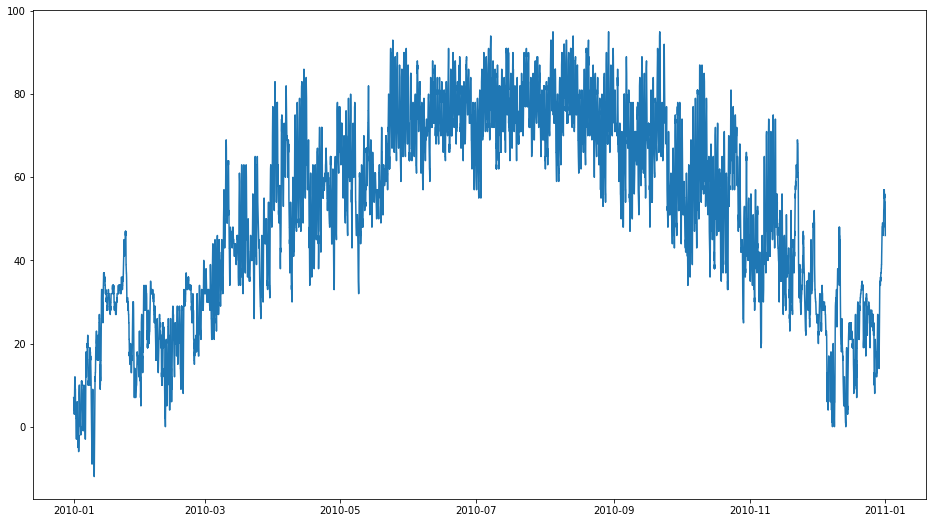

In [45]:
# Replaces the -999.99 values with None
interp10 = df10.replace(to_replace=-999.99, value=np.nan)

# Interpolates the data with method 'linear'
interp10 = interp10.interpolate(method='linear')
fig = plt.figure(figsize=(16,9),facecolor='w',edgecolor='k')
plt.plot(interp10['time'], interp10['temp'])

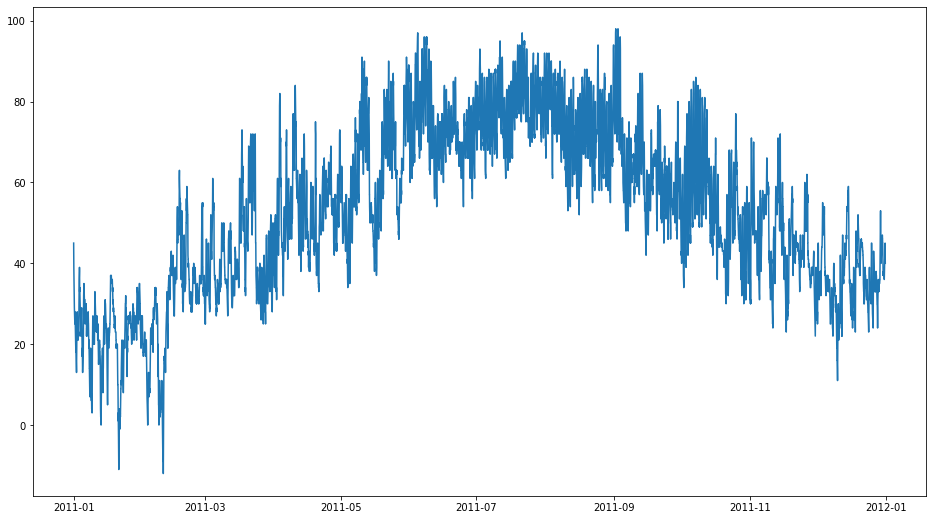

In [46]:
interp11 = df11.replace(to_replace=-999.99, value=np.nan)
interp11 = interp11.interpolate(method='linear')
fig = plt.figure(figsize=(16,9),facecolor='w',edgecolor='k')
plt.plot(interp11['time'], interp11['temp'])

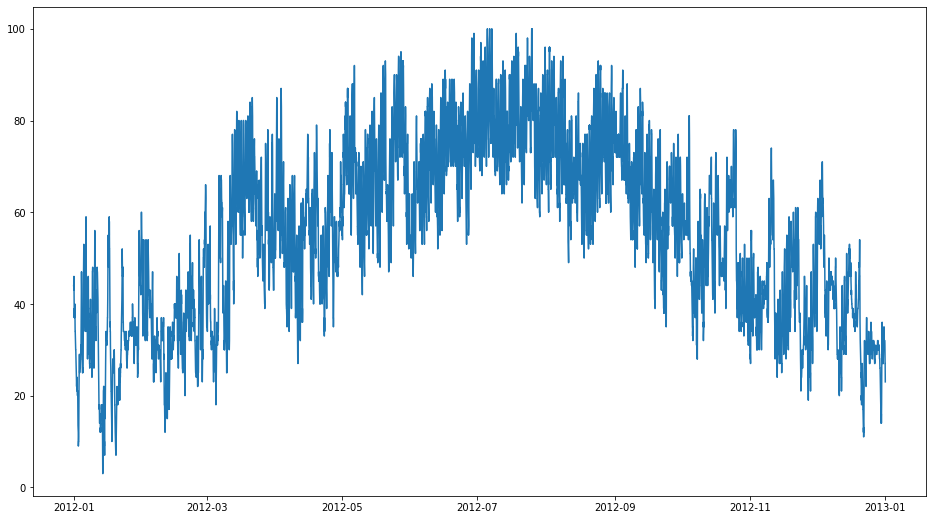

In [47]:
interp12 = df12.replace(to_replace=-999.99, value=np.nan)
interp12 = interp12.interpolate(method='linear')
fig = plt.figure(figsize=(16,9),facecolor='w',edgecolor='k')
plt.plot(interp12['time'], interp12['temp'])

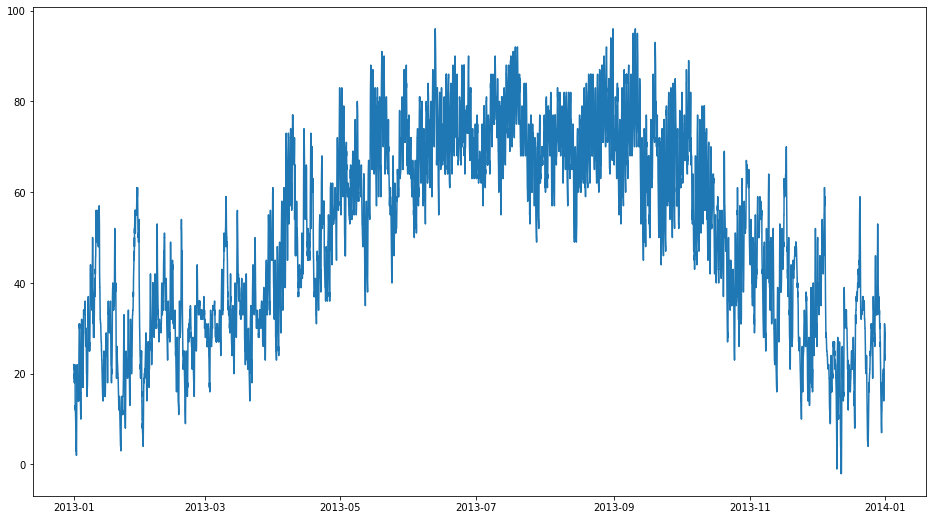

In [48]:
interp13 = df13.replace(to_replace=-999.99, value=np.nan)
interp13 = interp13.interpolate(method='linear')
fig = plt.figure(figsize=(16,9),facecolor='w',edgecolor='k')
plt.plot(interp13['time'], interp13['temp'])

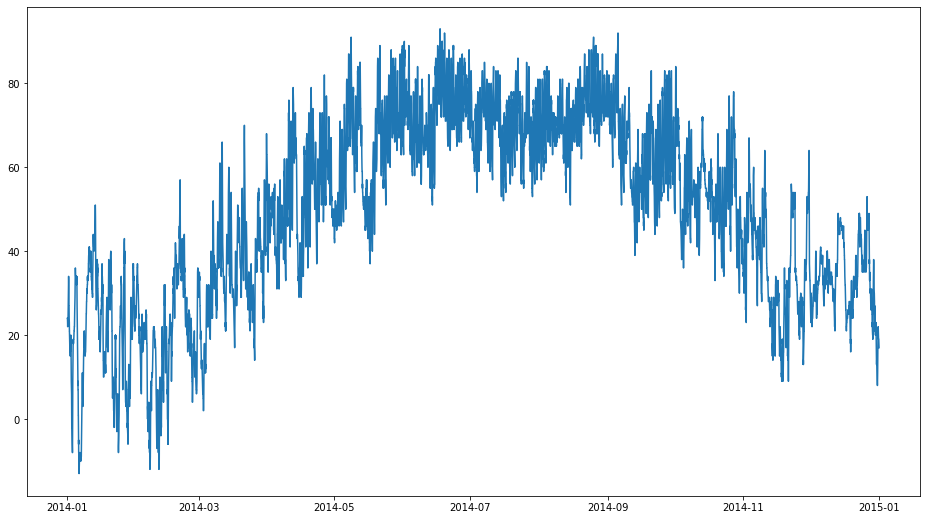

In [49]:
interp14 = df14.replace(to_replace=-999.99, value=np.nan)
interp14 = interp14.interpolate(method='linear')
fig = plt.figure(figsize=(16,9),facecolor='w',edgecolor='k')
plt.plot(interp14['time'], interp14['temp'])

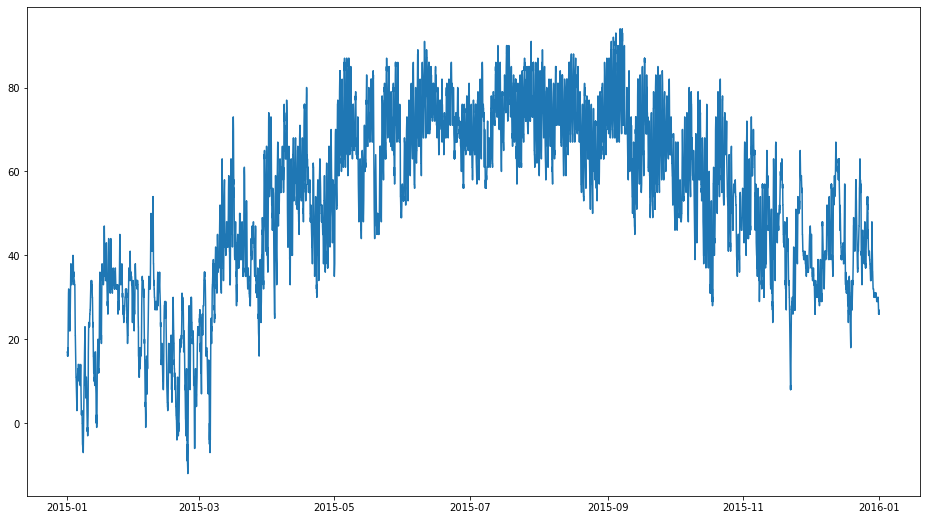

In [50]:
interp15 = df15.replace(to_replace=-999.99, value=np.nan)
interp15 = interp15.interpolate(method='linear')
fig = plt.figure(figsize=(16,9),facecolor='w',edgecolor='k')
plt.plot(interp15['time'], interp15['temp'])

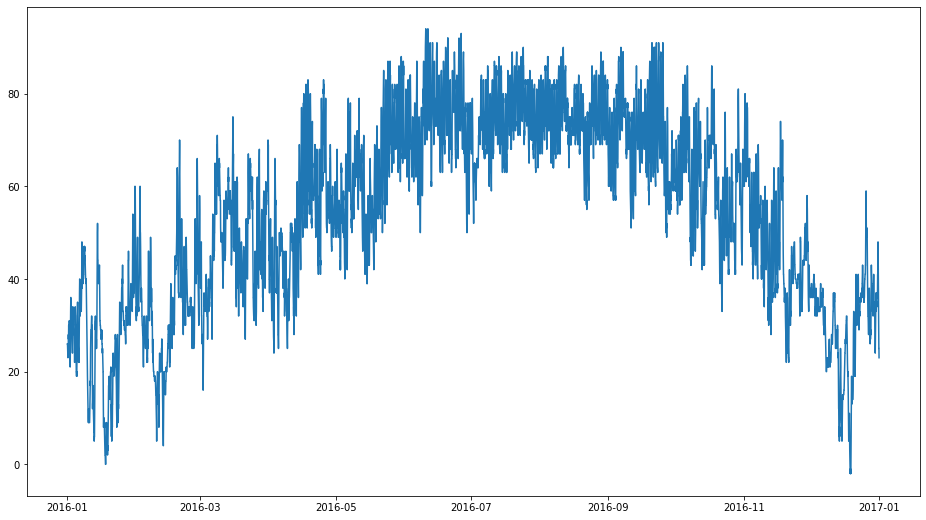

In [51]:
interp16 = df16.replace(to_replace=-999.99, value=np.nan)
interp16 = interp16.interpolate(method='linear')
fig = plt.figure(figsize=(16,9),facecolor='w',edgecolor='k')
plt.plot(interp16['time'], interp16['temp'])

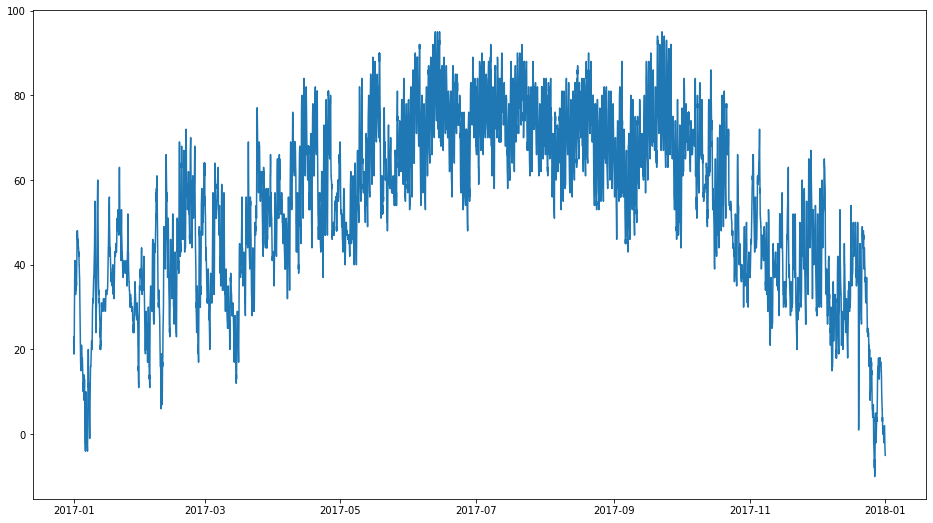

In [52]:
interp17 = df17.replace(to_replace=-999.99, value=np.nan)
interp17 = interp17.interpolate(method='linear')
fig = plt.figure(figsize=(16,9),facecolor='w',edgecolor='k')
plt.plot(interp17['time'], interp17['temp'])

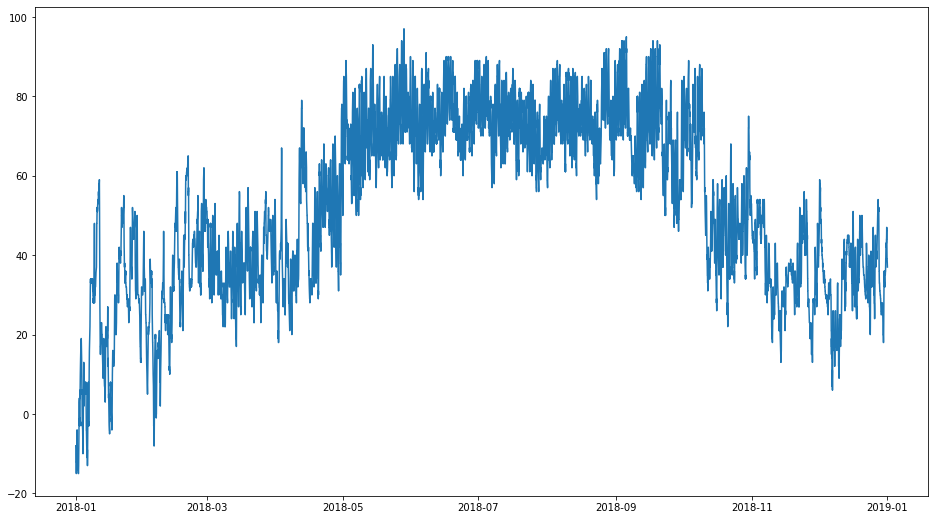

In [53]:
interp18 = df18.replace(to_replace=-999.99, value=np.nan)
interp18 = interp18.interpolate(method='linear')
fig = plt.figure(figsize=(16,9),facecolor='w',edgecolor='k')
plt.plot(interp18['time'], interp18['temp'])

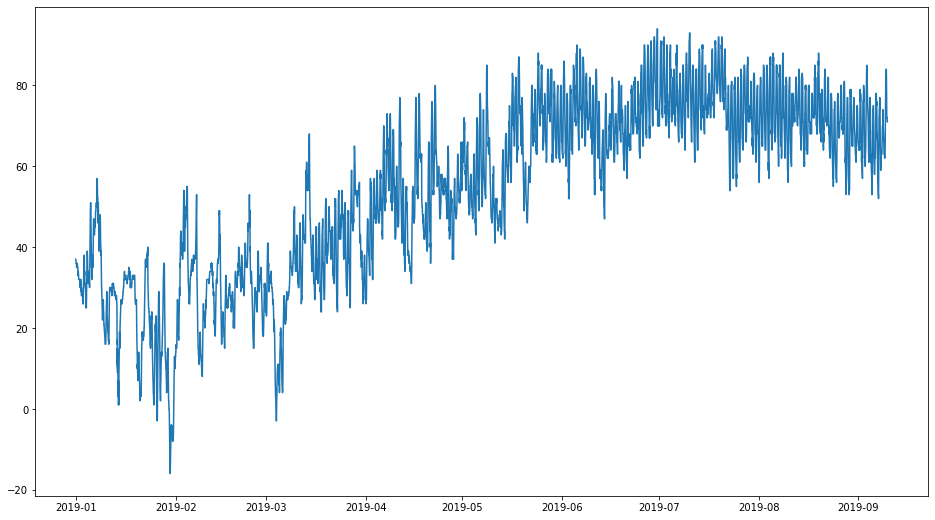

In [54]:
interp19 = df19.replace(to_replace=-999.99, value=np.nan)
interp19 = interp19.interpolate(method='linear')
fig = plt.figure(figsize=(16,9),facecolor='w',edgecolor='k')
plt.plot(interp19['time'], interp19['temp'])

In [55]:
# convert index to datetime index

interp10.index = pd.to_datetime(interp10.time)
interp11.index = pd.to_datetime(interp11.time)
interp12.index = pd.to_datetime(interp12.time)
interp13.index = pd.to_datetime(interp13.time)
interp14.index = pd.to_datetime(interp14.time)
interp15.index = pd.to_datetime(interp15.time)
interp16.index = pd.to_datetime(interp16.time)
interp17.index = pd.to_datetime(interp17.time)
interp18.index = pd.to_datetime(interp18.time)
interp19.index = pd.to_datetime(interp19.time)

interp10

,time,temp,prec,vis
time,,,,
2010-01-01 00:53:00,2010-01-01 00:53:00,7.0,0.00,10
2010-01-01 01:53:00,2010-01-01 01:53:00,7.0,0.00,10
2010-01-01 02:53:00,2010-01-01 02:53:00,6.0,0.00,10
2010-01-01 03:53:00,2010-01-01 03:53:00,5.0,0.00,10
2010-01-01 04:53:00,2010-01-01 04:53:00,4.0,0.00,10
...,...,...,...,...
2010-12-31 21:53:00,2010-12-31 21:53:00,54.0,0.01,5
2010-12-31 22:53:00,2010-12-31 22:53:00,54.0,0.03,8
2010-12-31 23:53:00,2010-12-31 23:53:00,46.0,0.01,10


In [0]:
# resample by hour
interp10 = interp10.resample('H').mean()
interp11 = interp11.resample('H').mean()
interp12 = interp12.resample('H').mean()
interp13 = interp13.resample('H').mean()
interp14 = interp14.resample('H').mean()
interp15 = interp15.resample('H').mean()
interp16 = interp16.resample('H').mean()
interp17 = interp17.resample('H').mean()
interp18 = interp18.resample('H').mean()
interp19 = interp19.resample('H').mean()

### Step 3: Create a column of hour numbers in each dataframe you wish to use

I will be using the years 2010, 2013, 2014, 2015, 2017, 2018 because they all 
have 8760 hours in them, where leap years do not (and 2011 is missing 6 hours and I don't feel like replacing them). This should be sufficient for creating a typical history. 

In [0]:
interp10 = interp10.reset_index(drop=False)
interp13 = interp13.reset_index(drop=False)
interp14 = interp14.reset_index(drop=False)
interp15 = interp15.reset_index(drop=False)
interp17 = interp17.reset_index(drop=False)
interp18 = interp18.reset_index(drop=False)

In [0]:
interp10['time'] = interp10.index
interp13['time'] = interp13.index 
interp14['time'] = interp14.index 
interp15['time'] = interp15.index 
interp17['time'] = interp17.index 
interp18['time'] = interp18.index  

### Step 4: Save Each Dataframe as a CSV file

In [0]:
interp10.to_csv('cu_weather2010.csv')
interp13.to_csv('cu_weather2013.csv')
interp14.to_csv('cu_weather2014.csv')
interp15.to_csv('cu_weather2015.csv')
interp17.to_csv('cu_weather2017.csv')
interp18.to_csv('cu_weather2018.csv')

# Upload the "Typical Yearly Weather"

In [61]:
from google.colab import files
upload2 = files.upload()

Saving printTypicalWeather_0.csv to printTypicalWeather_0.csv


In [0]:
import pandas as pd
import numpy as np

typical_year = pd.read_csv('printTypicalWeather_0.csv')


In [63]:
typical_year

,time,temp,prec
0,0,22.000000,0.0
1,1,21.000000,0.0
2,2,23.000000,0.0
3,3,19.666667,0.0
4,4,20.000000,0.0
...,...,...,...
8755,8755,26.000000,0.0
8756,8756,27.000000,0.0
8757,8757,27.000000,0.0
8758,8758,27.000000,0.0


In [0]:
# convert fahrenheit to celcius

to_celcius = lambda x: (x-32)*5/9

typical_year['temp'] = typical_year['temp'].apply(to_celcius)

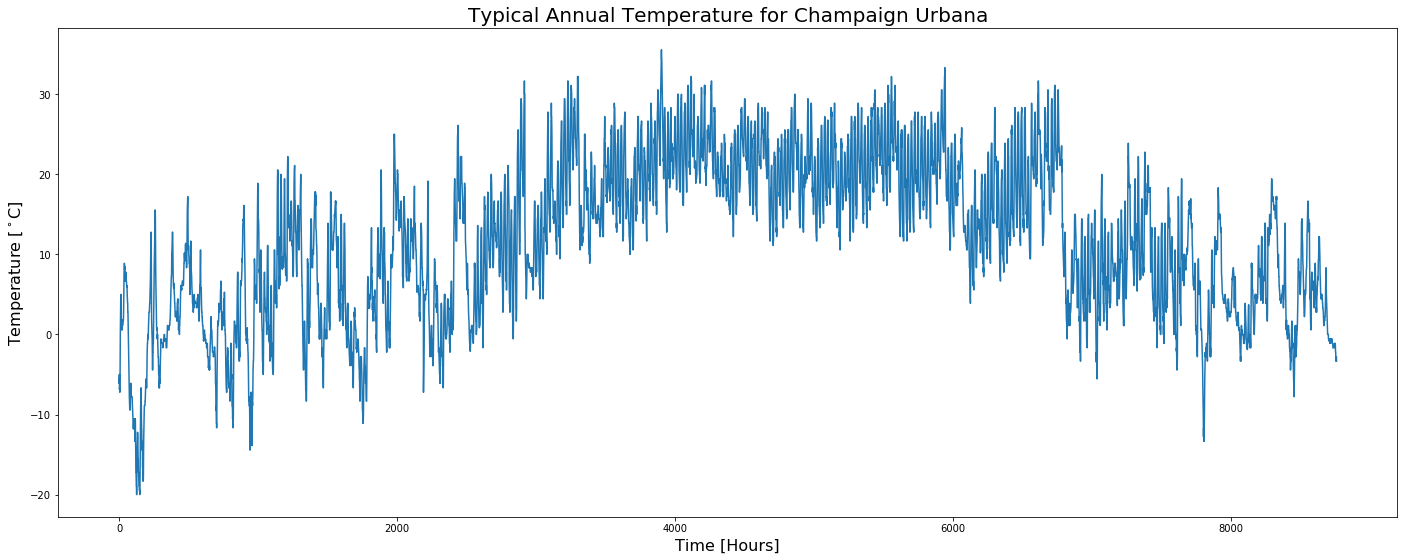

In [67]:
fig = plt.figure(figsize=(24,9),edgecolor='k',facecolor='w')
plt.plot(typical_year['time'], typical_year['temp'])
plt.xlabel('Time [Hours]',fontsize=16)
plt.ylabel('Temperature [$^\circ$C]',fontsize=16)
plt.title('Typical Annual Temperature for Champaign Urbana',fontsize=20)
plt.show()